<a href="https://colab.research.google.com/github/TasneemAly86/ML/blob/main/Module_3_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Module 3 : Exploratory Data Analysis & Data Cleaning**


# Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
data = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/lab TC 6244/Lab 1 Module 1 to 4/data/population_literacy.xlsx')
print(data.sheet_names)

['Sheet1']


In [ ]:
df = data.parse('Sheet1')
df.head()

,Country,Continent,female literacy,fertility,population
0,Chine,ASI,90.5,1.769,1.324655e+09
1,Inde,ASI,50.8,2.682,1.139965e+09
2,USA,NAM,99.0,2.077,3.040600e+08
3,Indonésie,ASI,88.8,2.132,2.273451e+08
4,Brésil,LAT,90.2,1.827,NaN


In [ ]:
df.columns

Index(['Country ', 'Continent  ', 'female literacy', 'fertility',
       'population'],
      dtype='object')

In [ ]:
df.rename(columns={'Country ': 'Country', 'Continent': 'Continent', 'female literacy': 'Female Literacy', 'fertility': 'Fertility', 'population': 'Population'}, inplace=True)

In [ ]:
 df.columns

Index(['Country', 'Continent  ', 'Female Literacy', 'Fertility', 'Population'], dtype='object')

In [ ]:
df.shape

(163, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          163 non-null    object 
 1   Continent        163 non-null    object 
 2   Female Literacy  163 non-null    float64
 3   Fertility        163 non-null    float64
 4   Population       148 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.5+ KB


In [ ]:
df.isna().any()
df.isna().any(axis=1)
df.loc[df.isna().any(axis=1),df.isna().any()]

,Population
4,NaN
16,NaN
17,NaN
19,NaN
27,NaN
49,NaN
51,NaN
86,NaN
94,NaN
100,NaN


In [ ]:
df['Population'].value_counts(dropna=False). head()

NaN           15
5493621.0      2
1167834.0      1
46258200.0     1
31656865.0     1
Name: Population, dtype: int64

In [ ]:
df['Country'].value_counts(dropna=False).head()

Denmark            2
Bélarus            1
Norway             1
Singapour          1
Arabie saoudite    1
Name: Country, dtype: int64

In [ ]:
df.describe()

,Female Literacy,Fertility,Population
count,163.000000,163.000000,1.480000e+02
mean,80.223313,2.872356,6.360217e+07
std,23.028749,1.425467,3.079884e+08
min,12.600000,0.966000,1.035660e+05
25%,66.550000,1.824500,3.574732e+06
50%,90.200000,2.362000,9.776874e+06
75%,98.500000,3.877500,2.881632e+07
max,100.000000,7.069000,3.336134e+09


# **Visual EDA**

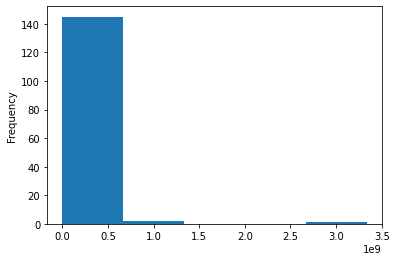

In [ ]:
import matplotlib.pyplot as plt
df.Population.plot(kind='hist',bins=5)

# **Boxplot**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


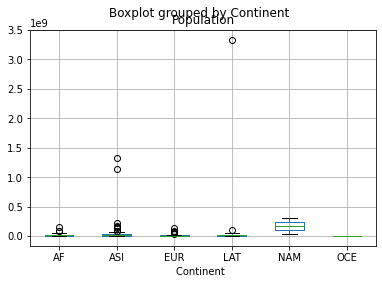

In [ ]:
df.boxplot(column='Population', by= 'Continent  ')

# **Scatter Plot**

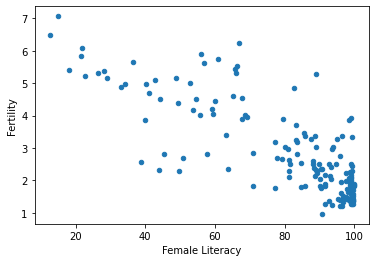

In [ ]:
df.plot.scatter(x='Female Literacy', y='Fertility')

**Tidy Data**

In [ ]:
tidy_data = pd.DataFrame(data={'name': ['Daniel', 'John', 'Jane'], 'treatment a': [10, 12, 24], 'treatment b': [42, 31, 27]})
print(tidy_data)

     name  treatment a  treatment b
0  Daniel           10           42
1    John           12           31
2    Jane           24           27


In [ ]:
tidy_data_melt = pd.melt(frame=tidy_data, id_vars='name', value_vars=['treatment a', 'treatment b'], var_name='treatment', value_name='reading')
tidy_data_melt

,name,treatment,reading
0,Daniel,treatment a,10
1,John,treatment a,12
2,Jane,treatment a,24
3,Daniel,treatment b,42
4,John,treatment b,31
5,Jane,treatment b,27


In [ ]:
tidy_data = tidy_data_melt.pivot(index='name', columns='treatment', values='reading')
tidy_data

treatment,treatment a,treatment b
name,,
Daniel,10,42
Jane,24,27
John,12,31


In [ ]:
tidy_data_melt = tidy_data_melt.append(pd.DataFrame(data={'name': ['Jane'],'treatment': ['treatment a'], 'reading': [16]}))

In [ ]:
import numpy as np
tidy_data_melt

,name,treatment,reading
0,Daniel,treatment a,10
1,John,treatment a,12
2,Jane,treatment a,24
3,Daniel,treatment b,42
4,John,treatment b,31
5,Jane,treatment b,27
0,Jane,treatment a,16


In [ ]:
tidy_data_melt.pivot_table(index='name', columns='treatment', values='reading', aggfunc=np. mean)

treatment,treatment a,treatment b
name,,
Daniel,10,42
Jane,20,27
John,12,31


**Sampling Data**

In [ ]:
artificial_data = pd.DataFrame(np.random.randint(0,10,size=(20, 2)), columns=list('AB'))
print(artificial_data)

    A  B
0   2  0
1   4  7
2   6  8
3   0  9
4   1  8
5   8  3
6   4  1
7   1  5
8   4  1
9   3  3
10  0  3
11  2  5
12  9  9
13  6  1
14  2  2
15  0  1
16  6  0
17  6  8
18  8  5
19  7  4


In [ ]:
artificial_data.sample(frac=0.3)

,A,B
4,1,8
5,8,3
6,4,1
3,0,9
13,6,1
9,3,3


In [ ]:
artificial_data.sample(n=4)

,A,B
15,0,1
13,6,1
18,8,5
0,2,0


**Removing Erratic Entries**

In [ ]:
erratic_data = pd.DataFrame(data={'name': ['Daniel', 'John', 'Jane'], 'treatment a': ['-', 12, 24], 'treatment b': [42, 31, 27]})
erratic_data

,name,treatment a,treatment b
0,Daniel,-,42
1,John,12,31
2,Jane,24,27


In [ ]:

erratic_data['treatment a'] = pd.to_numeric(erratic_data['treatment a'], errors='coerce')
erratic_data

,name,treatment a,treatment b
0,Daniel,NaN,42
1,John,12.0,31
2,Jane,24.0,27


**Dropping Duplicates**

In [ ]:
erratic_data = erratic_data.append(pd.DataFrame(data={'name': ['Jane'],'treatment a': [24.0 ], 'treatment b': [27]}))

In [ ]:
erratic_data.duplicated()

0    False
1    False
2    False
0     True
dtype: bool

In [ ]:
# Remove duplicate using drop_duplicates()
erratic_data.drop_duplicates()

,name,treatment a,treatment b
0,Daniel,NaN,42
1,John,12.0,31
2,Jane,24.0,27


# **Missing Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          163 non-null    object 
 1   Continent        163 non-null    object 
 2   Female Literacy  163 non-null    float64
 3   Fertility        163 non-null    float64
 4   Population       148 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.5+ KB


In [ ]:
df_dropna=df.dropna()

In [ ]:
df_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148 entries, 0 to 162
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          148 non-null    object 
 1   Continent        148 non-null    object 
 2   Female Literacy  148 non-null    float64
 3   Fertility        148 non-null    float64
 4   Population       148 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.9+ KB


In [ ]:
df[df.isnull().any(axis=1)]

,Country,Continent,Female Literacy,Fertility,Population
4,Brésil,LAT,90.2,1.827,NaN
16,Turquie,ASI,81.3,2.100,NaN
17,"Iran, République islamique d'",ASI,77.2,1.781,NaN
19,Rép. Démocratique du Congo,AF,56.1,5.908,NaN
27,Espagne,EUR,96.9,1.468,NaN
49,Mozambique,AF,40.1,4.967,NaN
51,Côte d'Ivoire,AF,44.3,4.514,NaN
86,Burundi,AF,59.9,4.450,NaN
94,Togo,AF,53.7,4.166,NaN
100,Nicaragua,LAT,77.9,2.683,NaN


Use fillna() method to fill missing data in Population column with median values

In [ ]:
df['Population'] = df['Population'].fillna(df['Population'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          163 non-null    object 
 1   Continent        163 non-null    object 
 2   Female Literacy  163 non-null    float64
 3   Fertility        163 non-null    float64
 4   Population       163 non-null    float64
dtypes: float64(3), object(2)
memory usage: 6.5+ KB


# **String manipulation**

In [ ]:
str = 'raju ganesh banusha pravin ravind'
str_list = str.split(' ')
print(str_list)

['raju', 'ganesh', 'banusha', 'pravin', 'ravind']


In [ ]:
str = 'Everyone hates data science'
str.replace('hates','loves')

'Everyone loves data science'

In [ ]:
 str = '    Erratic white space in this sentence '
 print(str)

    Erratic white space in this sentence 


In [ ]:
str = str.strip()
print(str)

Erratic white space in this sentence


# **Using Regex**

In [ ]:
import re
pattern = re.compile('[A-Z]{2}\d{6}')
result = pattern.match('FA146556')
bool(result)

True